In [1]:
import glob
import numpy as np
import pandas as pd

In [2]:
df_6d = pd.read_csv("../data/evaluation/6d-eval-100_epoch.csv").iloc[:,1:]
df_quat = pd.read_csv("../data/evaluation/quat-eval-100_epoch.csv").iloc[:,1:]
df_unseen = pd.read_csv("../data/evaluation/6d-unseen-100_epoch.csv").iloc[:,1:]

In [3]:
# parsing filename to obtain data name
filelist = glob.glob("../data/evaluation/data-eval/*")
filelist += glob.glob("../data/evaluation/data-unseen/*")
scene_ids = pd.Series(filelist)[:-1].str.split("\\").str[1].str.split("_").str[0]
nums = pd.Series(filelist)[:-1].str.split("\\").str[1].str.split("_").str[1]
id_map = {}
for scene_id, num in zip(scene_ids, nums):
    id_map[scene_id] = num

In [4]:
object_list = [
    "002_master_chef_can",
    "003_cracker_box",
    "004_sugar_box",
    "005_tomato_soup_can",
    "006_mustard_bottle",
    "008_pudding_box",
    "010_potted_meat_can",
    "021_bleach_cleanser",
    "022_windex_bottle",
    "025_mug",
    "019_pitcher_base", 
    "026_sponge", 
    "048_hammer", 
    "053_mini_soccer_ball", 
    "077_rubiks_cube"
]
object_number_list = [2, 3, 4, 5, 6, 8, 10, 21, 22, 25, 19, 26, 48, 53, 77]
object_map = {i:name for i, name in zip(object_number_list, object_list)}

In [5]:
df_6d["object"] = df_6d["scene_id"].apply(lambda x: id_map[x])
df_6d["object"] = df_6d["object"].astype(int)
df_quat["object"] = df_quat["scene_id"].apply(lambda x: id_map[x])
df_quat["object"] = df_quat["object"].astype(int)
df_unseen["object"] = df_unseen["scene_id"].apply(lambda x: id_map[x])
df_unseen["object"] = df_unseen["object"].astype(int)

In [8]:
#for 6d
rot_col = ["r11", "r21", "r31", "r12", "r22", "r32", "r13", "r23", "r33"]
pred_rot_col = ["pred-"+r for r in ["r11", "r21", "r31", "r12", "r22", "r32", "r13", "r23", "r33"]]
rot_true = df_6d.loc[:,rot_col]
rot_pred = df_6d.loc[:,pred_rot_col]

rot_true_list_6d = []
rot_pred_list_6d = []
tilted_angle_list = []
for i, row in df_6d.iterrows():
    rot_true = row.loc[rot_col].to_numpy().reshape(3,3,order="F").astype(float)
    rot_pred = row.loc[pred_rot_col].to_numpy().reshape(3,3,order="F").astype(float)
    tilted = np.arccos((np.trace(rot_true) - 1)/2)
    #rot_true_list.append(rot_true)
    #rot_pred_list.append(rot_pred)
    tilted_angle_list.append(tilted)
df_6d["tilted_angle"] = tilted_angle_list

In [9]:
#for quat
quat_col = ["ornx", "orny", "ornz", "ornw"]
pred_quat_col = ["pred-" + r for r in quat_col]
#quat_true = df_quat.loc[:,quat_col]
#rot_true = df_quat.loc[:,rot_col]
#quat_pred = df_quat.loc[:,pred_quat_col]

quat_true_list_quat = []
quat_pred_list_6d = []
tilted_angle_list = []
for i, row in df_quat.iterrows():
    quat_true = row.loc[quat_col].to_numpy().astype(float)
    quat_pred = row.loc[pred_quat_col].to_numpy().astype(float)
    rot_true = row.loc[rot_col].to_numpy().reshape(3,3,order="F").astype(float)
    tilted = np.arccos((np.trace(rot_true) - 1)/2)
    #rot_true_list.append(quat_true)
    #rot_pred_list.append(quat_pred)
    tilted_angle_list.append(tilted)
df_quat["tilted_angle"] = tilted_angle_list

In [311]:
#for 6d
rot_col = ["r11", "r21", "r31", "r12", "r22", "r32", "r13", "r23", "r33"]
pred_rot_col = ["pred-"+r for r in ["r11", "r21", "r31", "r12", "r22", "r32", "r13", "r23", "r33"]]
rot_true = df_unseen.loc[:,rot_col]
rot_pred = df_unseen.loc[:,pred_rot_col]

rot_true_list_6d = []
rot_pred_list_6d = []
tilted_angle_list = []
for i, row in df_unseen.iterrows():
    rot_true = row.loc[rot_col].to_numpy().reshape(3,3,order="F").astype(float)
    rot_pred = row.loc[pred_rot_col].to_numpy().reshape(3,3,order="F").astype(float)
    tilted = np.arccos((np.trace(rot_true) - 1)/2)
    rot_true_list.append(rot_true)
    rot_pred_list.append(rot_pred)
    tilted_angle_list.append(tilted)
df_unseen["tilted_angle"] = tilted_angle_list

In [308]:
df_6d_inliers = df_6d[df_6d.loss < 20]
df_quat_inliers = df_quat[df_quat.loss < 20]


<AxesSubplot:xlabel='tilted_angle', ylabel='loss'>

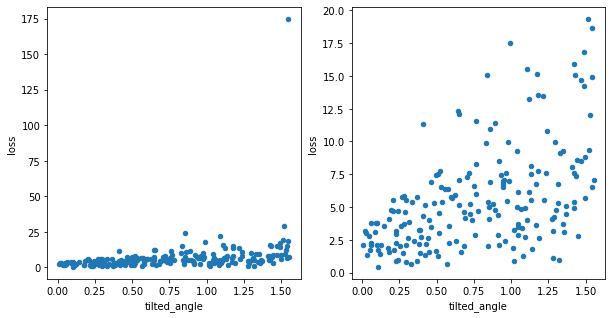

In [309]:
fig, axarr = plt.subplots(1, 2, figsize=[10, 5])
df_6d.plot.scatter(x="tilted_angle", y="loss", ax=axarr[0])
df_6d_inliers.plot.scatter(x="tilted_angle", y="loss", ax=axarr[1])

<AxesSubplot:xlabel='tilted_angle', ylabel='loss'>

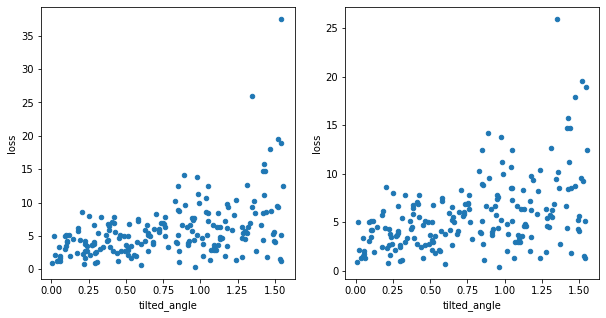

In [245]:
fig, axarr = plt.subplots(1, 2, figsize=[10, 5])
df_quat.plot.scatter(x="tilted_angle", y="loss", ax=axarr[0])
df_quat_inliers.plot.scatter(x="tilted_angle", y="loss", ax=axarr[1])

<AxesSubplot:xlabel='tilted_angle', ylabel='loss'>

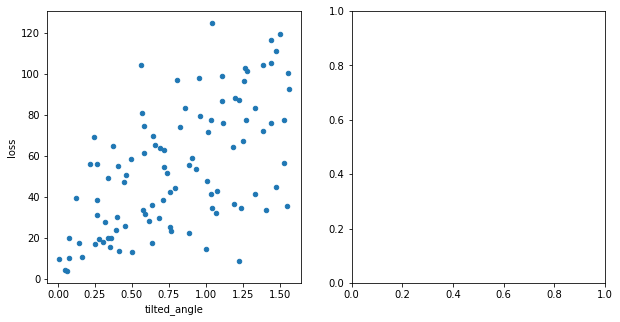

In [312]:
fig, axarr = plt.subplots(1, 2, figsize=[10, 5])
df_unseen.plot.scatter(x="tilted_angle", y="loss", ax=axarr[0])
#df_quat_inliers.plot.scatter(x="tilted_angle", y="loss", ax=axarr[1])

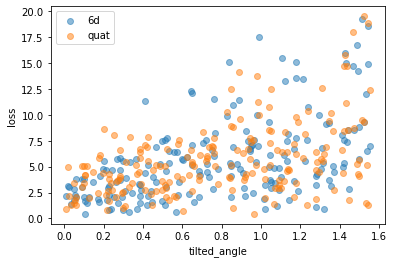

In [263]:
fig, ax = plt.subplots()
ax.scatter(df_6d_inliers.tilted_angle, df_6d_inliers.loss, label="6d", alpha=0.5)
ax.scatter(df_quat_inliers.tilted_angle, df_quat_inliers.loss, label="quat", alpha=0.5)
ax.set_xlabel("tilted_angle")
ax.set_ylabel("loss")
ax.legend()

In [252]:
df_6d_inliers.loss.mean()

5.887473792722585

In [284]:
df_6d_inliers.groupby(by="object")["loss"].mean().sort_values()

object
10    4.485859
4     4.565336
2     4.960179
3     4.972134
5     5.167591
6     5.592252
21    5.671894
8     5.995206
22    7.059657
25    7.470070
Name: loss, dtype: float64

In [274]:
df_quat.loss.mean()

5.840602234187361

In [282]:
df_quat_inliers.groupby(by="object")["loss"].std().sort_values()

object
3     2.232002
10    2.459824
4     2.737731
5     2.891728
6     3.052260
8     3.347780
22    3.816996
25    4.178349
2     4.404223
21    4.524194
Name: loss, dtype: float64

<AxesSubplot:title={'center':'loss'}, xlabel='object'>

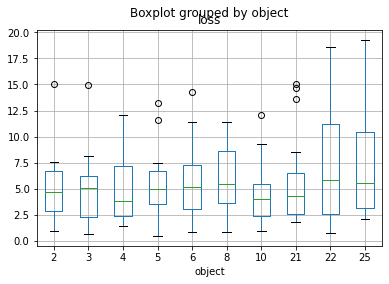

In [280]:
df_6d_inliers.boxplot(by="object", column="loss")

<AxesSubplot:title={'center':'loss'}, xlabel='object'>

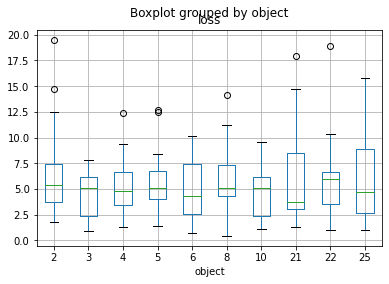

In [281]:
df_quat_inliers.boxplot(by="object", column="loss")

<AxesSubplot:title={'center':'loss'}, xlabel='object'>

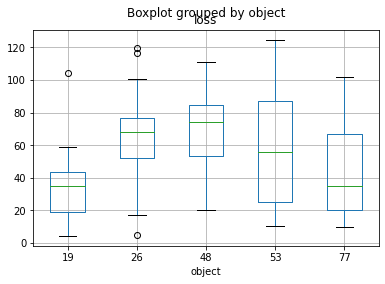

In [313]:
df_unseen.boxplot(by="object", column="loss")

In [314]:
df_unseen[df_unseen.object==19].loss.mean()

35.41043279443265

In [134]:
df_inliers.sort_values(by="loss", ascending=False).loc[0].scene_id

'04f983ec1f1f42cd99cf0a80fa33e4bf'

In [14]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [15]:
df = df_quat

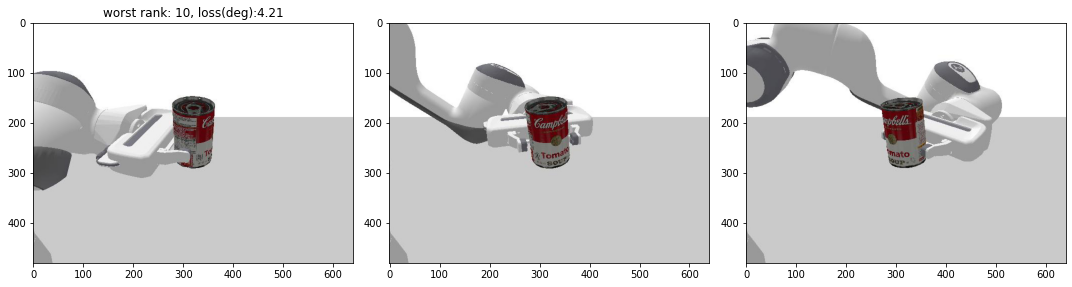

In [31]:
# worst_rank = 10
info = df[df.scene_id=="2ca0e02b00b54d30ae849d56130e6a99"].iloc[0]#df.sort_values(by="loss", ascending=False).iloc[worst_rank]
scene_id = info.scene_id
mask1 = pd.Series(filelist).str.contains(scene_id)
mask2 = pd.Series(filelist).str.contains("seg")
jpglist = pd.Series(filelist)[mask1 & ~mask2]
# plot
fig, axarr = plt.subplots(1, 3, figsize=[15, 7])
axarr[0].set_title(f"worst rank: {worst_rank}, loss(deg):{info.loss:.2f}")
for i, file in enumerate(jpglist):
    img = mpimg.imread(file)
    axarr[i].imshow(img)
plt.tight_layout()

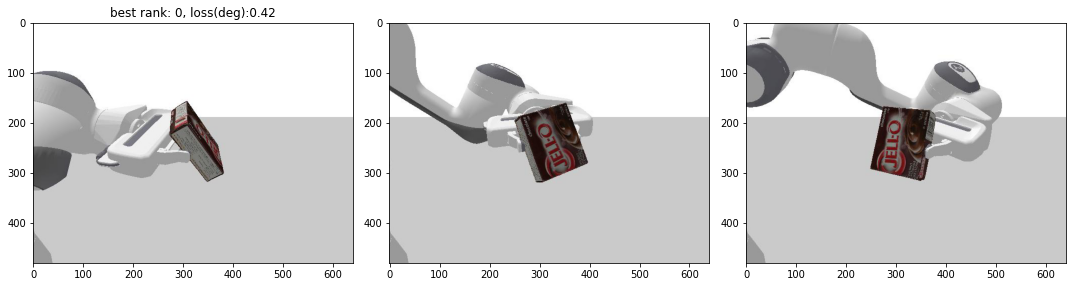

In [17]:
best_rank = 0
info = df.sort_values(by="loss", ascending=True).iloc[best_rank]
scene_id = info.scene_id
mask1 = pd.Series(filelist).str.contains(scene_id)
mask2 = pd.Series(filelist).str.contains("seg")
jpglist = pd.Series(filelist)[mask1 & ~mask2]
# plot
fig, axarr = plt.subplots(1, 3, figsize=[15, 7])
axarr[0].set_title(f"best rank: {best_rank}, loss(deg):{info.loss:.2f}")
for i, file in enumerate(jpglist):
    img = mpimg.imread(file)
    axarr[i].imshow(img)
plt.tight_layout()

In [32]:
print("pred")
rot = info[pred_quat_col].to_numpy()
rot_string = "["
for r in rot:
    rot_string += str(r)
    rot_string += ","
rot_string += "]"
print(object_map[info.object])
print(rot_string)

pred
005_tomato_soup_can
[0.0308963917195796,-0.0136744258925318,-8.026557043194771e-05,0.9994290471076964,]


In [33]:
print("label")
qtn = info[["ornx0", "orny0", "ornz0", "ornw0"]].to_numpy()
qtn_string = "["
for q in qtn:
    qtn_string += str(q)
    qtn_string += ","
qtn_string += "]"
print(object_map[info.object])
print(qtn_string)

label
005_tomato_soup_can
[0.5156777266951201,-0.4643074190015287,-0.4859241116089076,0.5313876744974294,]


In [20]:
df.sort_values(by="loss", ascending=False)

,scene_id,ornx,orny,ornz,ornw,ornx0,orny0,ornz0,ornw0,r11,...,r23,r33,pred-ornx,pred-orny,pred-ornz,pred-ornw,geodesic-loss,loss,object,tilted_angle
133,460e76e476d54e8ba9c8f72a70ee8fea,0.696387,0.036516,-5.551115e-17,-0.716737,0.059302,-0.075094,0.684243,0.722949,0.997333,...,0.998252,0.027423,-0.453220,0.097382,0.000157,0.886064,0.653225,37.427013,4,1.543369
47,7c5de0eae6ee406f9b91e0bd530429f6,0.073195,0.619891,5.551115e-17,-0.781267,-0.971062,0.079215,0.097081,-0.203320,0.231471,...,0.114369,0.220756,-0.291862,-0.623337,0.000150,0.725443,0.452378,25.919361,10,1.348207
139,12185267ed304303bd2e863708fb6bf0,-0.298166,-0.621840,0.000000e+00,-0.724162,-0.086034,-0.474902,-0.851341,0.205632,0.226629,...,-0.431842,0.048822,0.137313,0.677476,-0.000015,0.722614,0.340834,19.528349,2,1.521954
65,9bca5388b5c44f38a2330a9be62c81fd,-0.038036,0.696269,2.775558e-17,-0.716773,-0.936329,-0.020732,0.022444,-0.349791,0.030420,...,-0.054526,0.027527,-0.124991,-0.674751,-0.000432,0.727385,0.329942,18.904265,22,1.543266
144,47d830afb1324cc38c791abeba12e731,0.446375,0.500368,-2.775558e-17,-0.741877,-0.928895,0.347792,0.088482,0.091462,0.499264,...,0.662311,0.100762,-0.530218,-0.369767,0.000300,0.762982,0.313573,17.966395,21,1.469863
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,f791bcd0ad72436bb8b6b62336a0b9a0,-0.124468,-0.079177,2.775558e-17,-0.989059,0.399582,-0.463874,-0.602604,0.511882,0.987462,...,-0.246213,0.956477,0.124882,0.070526,-0.000063,0.989662,0.017365,0.994934,22,0.296115
151,596afe3df5a14385840fe2c1fca0932a,0.002643,0.002779,1.387779e-16,-0.999993,-0.576132,0.414073,0.570758,-0.413341,0.999985,...,0.005286,0.999971,0.004023,0.001558,-0.000087,0.999991,0.015908,0.911441,3,0.007671
159,75eb8bae9665402ba3bff7586df5aaf4,-0.100931,0.038146,-1.110223e-16,-0.994162,0.610071,-0.255796,-0.629798,0.407108,0.997090,...,-0.200684,0.976715,0.093781,-0.037020,-0.000051,0.994904,0.014555,0.833932,6,0.216220
82,1cb6177059e243cea573b9fa34ba531b,0.288124,-0.068814,0.000000e+00,-0.955117,0.301579,0.365117,-0.657583,-0.585939,0.990529,...,0.550385,0.824498,-0.292337,0.064944,0.000110,0.954108,0.011620,0.665798,6,0.601481
